In [14]:
import pandas as pd
import os
from matplotlib import pyplot as plt
from tqdm import tqdm
import numpy as np
import scipy.signal

In [15]:
strain = pd.read_csv("Strain_5.csv")
strain.head()

,Unnamed: 0,filenames,frame_num,x1,y1,error_1,x2,y2,error_2,length,angle
0,0,0X101E654AF3FC07A8.avi,0,46,61,4.000000,75,63,2.0,112,3.141593
1,1,0X101E654AF3FC07A8.avi,1,50,63,2.000000,75,63,2.0,115,3.141593
2,2,0X101E654AF3FC07A8.avi,2,49,63,2.236068,74,63,2.0,116,3.141593
3,3,0X101E654AF3FC07A8.avi,3,48,62,2.236068,74,63,2.0,111,3.141593
4,4,0X101E654AF3FC07A8.avi,4,50,63,2.000000,73,63,2.0,116,3.141593


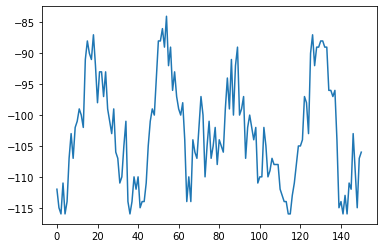

In [16]:
plt.plot(-strain[strain.filenames=='0X101E654AF3FC07A8.avi'].length)

100%|██████████████████████████████████████████████████████████████████████████████| 3198/3198 [05:51<00:00,  9.09it/s]


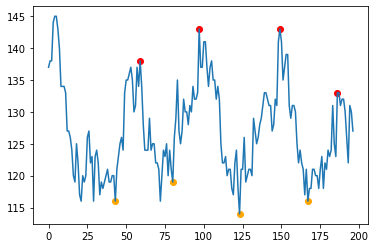

In [46]:
ratios = []
for vid in tqdm(strain.filenames.unique()):
    plt.clf()
    temp = strain[strain.filenames==vid].reset_index().length
    ratios.append([])
    plt.plot(temp)
    x = scipy.signal.find_peaks(-temp,distance=32)[0]
    for i in range(0,len(x)):
        plt.scatter(x[i],temp[x[i]],color='orange')
        if i==len(x)-1:
            y = np.argmax(temp[x[i]:])
        else:
            y = np.argmax(temp[x[i]:x[i+1]])
        plt.scatter(y+x[i],temp[y+x[i]],color='red')
        x_val = temp[x[i]]
        y_val = temp[y+x[i]]
        ratios[-1].append(x_val/y_val)
    plt.savefig(os.path.join('Ratio_Calc',vid[:-4]+'.png'))

length = []
average = []
rang = []
mian = []
miax = []
for i in ratios:
    length.append(len(i))
    average.append(np.mean(i))
    rang.append(max(i)-min(i))
    mian.append(min(i))
    miax.append(max(i))
plt.hist(length)
plt.title("Length")
plt.show()
plt.hist(average)
plt.title("Mean")
plt.show()
plt.hist(rang)
plt.title("range")
plt.show()
plt.hist(mian)
plt.title("Min")
plt.show()
plt.hist(miax)
plt.title("Max")
plt.show()

In [50]:
final_df = pd.DataFrame({"FileName":strain.filenames.unique(),"Length":length,"Mean":average,"Range":rang,"Min":mian,"Max":miax})

In [51]:
final_df.head()

,FileName,Length,Mean,Range,Min,Max
0,0X101E654AF3FC07A8.avi,4,0.751021,0.030399,0.736842,0.767241
1,0X10267ADF2E644E0.avi,4,0.731126,0.070681,0.684564,0.755245
2,0X102AE9C68B2C46DA.avi,4,0.823577,0.046473,0.801527,0.848000
3,0X102C51641C321436.avi,4,0.848342,0.064123,0.809211,0.873333
4,0X102CFB07F752AAE6.avi,4,0.840947,0.040973,0.818182,0.859155


(array([2.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00,
        1.100e+01, 3.550e+02, 1.108e+03, 1.830e+02]),
 array([0.        , 0.09277778, 0.18555556, 0.27833333, 0.37111111,
        0.46388889, 0.55666667, 0.64944444, 0.74222222, 0.835     ,
        0.92777778]),
 <a list of 10 Patch objects>)

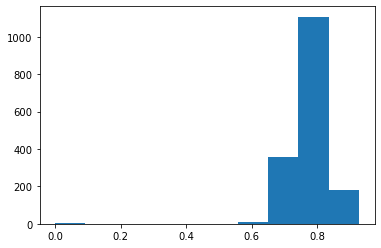

In [60]:
plt.hist(final_df[(final_df.Length==4) & (final_df.Range<=0.1)].Min)

In [61]:
final_df[final_df.Min<.5]

,FileName,Length,Mean,Range,Min,Max
6,0X102E453603FA1440.avi,5,0.660465,0.810006,0.137363,0.947368
8,0X102F3D4CD5E10801.avi,4,0.631169,0.815068,0.054795,0.869863
12,0X103A55B2546EF36E.avi,8,0.681687,0.931298,0.000000,0.931298
27,0X10623D3AF96AC271.avi,3,0.351121,0.133396,0.285106,0.418502
31,0X106A8FDB8A83534B.avi,5,0.702896,0.604394,0.314961,0.919355
...,...,...,...,...,...,...
3100,0X35B6193459F647D0.avi,4,0.694273,0.451089,0.363014,0.814103
3113,0X35FEF9072E3537BB.avi,5,0.729005,0.596432,0.310976,0.907407
3162,0X368E8CE3FB0A3F96.avi,3,0.064062,0.026316,0.052632,0.078947
3166,0X3693781992586497.avi,2,0.313876,0.017917,0.304918,0.322835
